# **Preprocess ve kümeleme**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

Mounted at /content/drive


In [2]:
df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/IZVA-Proje/Data/RawData.xlsx")
df.drop(labels = ['Unnamed: 0',"keyPassPerGame_y"],inplace=True,axis=1)
df.rename( {"keyPassPerGame_x":"keyPassPerGame"}, inplace=True)

In [3]:
df.head()

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue
0,402048,Erdem,Canpolat,Goalkeeper,Kasimpasa,14,194,85,20,1,1,0,1,1,0,90,0,0,1,0,0.0,0.000000,0.000000,0.000000,28.000000,60.714286,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,50000,50000
1,77438,Cenk,Tosun,Forward,Besiktas,1,183,78,30,1,1,0,3,2,1,175,3,1,0,0,10.0,3.333333,0.300000,1.000000,11.666667,74.285714,0.666667,0.666667,0.0,0.333333,1.000000,0.333333,0.333333,1.00000,0.0,0.000000,0.666667,0.333333,0.000000,1.000000,0.000000,1.333333,10000000,5000000
2,386144,Mustafa Burak,Bozan,Goalkeeper,Gaziantep FK,9,190,80,21,0,0,0,1,1,0,90,0,0,0,0,0.0,0.000000,0.000000,0.000000,27.000000,55.555556,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,2.000000,50000,50000
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.0,1.838710,1.967742,1.483871,0.580645,1.16129,0.0,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000
4,98123,Mario,Situm,Forward,Kayserispor,17,177,76,29,1,1,1,1,1,0,90,0,0,0,0,1.0,1.000000,0.000000,0.000000,31.000000,67.741935,2.000000,2.000000,0.0,0.000000,2.000000,1.000000,4.000000,2.00000,0.0,3.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,675000,600000


In [4]:
def mevki(x):
  if x =='Goalkeeper':
    return 0
  if x=='Defender':
    return 1
  if x=='Midfielder':
    return 2
  if x=='Forward':
    return 3
df['position'] = df.positionText.apply(mevki)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new_cluster = df[['apps','minsPlayed','firstStart']]
df_new_cluster.index = df.iloc[:,1]  + " " + df.iloc[:,2]
scaled_df = scaler.fit_transform(df_new_cluster)
kmeanss = KMeans(4)
kmeanss.fit(scaled_df)
df_new_cluster['kumeNoKmeans'] = kmeanss.labels_


In [6]:
df['kumeNoKmeans'] = kmeanss.labels_

In [7]:
df.head(14)

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans
0,402048,Erdem,Canpolat,Goalkeeper,Kasimpasa,14,194,85,20,1,1,0,1,1,0,90,0,0,1,0,0.0,0.000000,0.000000,0.000000,28.000000,60.714286,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,50000,50000,0,1
1,77438,Cenk,Tosun,Forward,Besiktas,1,183,78,30,1,1,0,3,2,1,175,3,1,0,0,10.0,3.333333,0.300000,1.000000,11.666667,74.285714,0.666667,0.666667,0.000000,0.333333,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.666667,0.333333,0.000000,1.000000,0.000000,1.333333,10000000,5000000,3,1
2,386144,Mustafa Burak,Bozan,Goalkeeper,Gaziantep FK,9,190,80,21,0,0,0,1,1,0,90,0,0,0,0,0.0,0.000000,0.000000,0.000000,27.000000,55.555556,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,2.000000,50000,50000,0,1
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.000000,1.838710,1.967742,1.483871,0.580645,1.161290,0.000000,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000,2,2
4,98123,Mario,Situm,Forward,Kayserispor,17,177,76,29,1,1,1,1,1,0,90,0,0,0,0,1.0,1.000000,0.000000,0.000000,31.000000,67.741935,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,4.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,675000,600000,3,1
5,31388,Diego,Perotti,Midfielder,Fenerbahce,3,179,70,33,1,1,1,4,2,2,193,3,0,0,0,11.0,2.750000,0.272727,0.500000,17.250000,82.608696,1.500000,1.000000,0.250000,0.750000,0.750000,2.250000,1.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.500000,4000000,1800000,2,1
6,86081,Anastasios,Bakasetas,Forward,Trabzonspor,4,181,75,28,1,0,1,19,18,1,1603,7,2,5,0,53.0,2.789474,0.132075,1.842105,44.421053,84.241706,1.631579,1.736842,0.000000,1.105263,1.263158,1.526316,0.315789,1.421053,0.052632,0.263158,0.578947,0.000000,1.684211,3.526316,0.105263,0.736842,5000000,7000000,3,0
7,136320,Gastón,Campi,Defender,Fatih Karagumruk,8,193,88,30,1,0,1,3,2,1,243,1,1,0,0,2.0,0.466667,0.500000,0.333333,41.666667,84.800000,0.000000,0.133333,0.000000,0.000000,0.333333,0.666667,1.666667,0.666667,0.000000,4.000000,0.333333,0.333333,0.000000,3.666667,0.000000,5.666667,1300000,1200000,1,1
8,124209,Caleb,Ekuban,Forward,Trabzonspor,4,188,80,27,0,0,1,32,32,0,2748,10,4,3,0,71.0,2.218750,0.140845,1.437500,32.343750,78.067633,2.406250,1.781250,0.093750,1.937500,3.156250,1.281250,0.687500,1.250000,0.031250,0.531250,0.625000,0.156250,0.156250,0.937500,0.000000,1.437500,5500000,7000000,3,2
9,327719,Anthony,Nwakaeme,Forward,Trabzonspor,4,185,80,32,0,0,1,34,34,0,2970,7,5,3,1,105.0,3.088235,0.066667,1.235294,41.294118,79.059829,2.852941,1.088235,0.411765,2.735294,2.352941,1.558824,0.764706,1.000000,0.088235,1.029412,0.970588,0.029412,0.470588,2.617647,0.029412,1.117647,5000000,5000000,3,2


**Cluster B**

In [8]:
df_B = df.loc[df.kumeNoKmeans != 1]  

In [9]:
df_B.head(30)

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.000000,1.838710,1.967742,1.483871,0.580645,1.161290,0.000000,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000,2,2
6,86081,Anastasios,Bakasetas,Forward,Trabzonspor,4,181,75,28,1,0,1,19,18,1,1603,7,2,5,0,53.0,2.789474,0.132075,1.842105,44.421053,84.241706,1.631579,1.736842,0.000000,1.105263,1.263158,1.526316,0.315789,1.421053,0.052632,0.263158,0.578947,0.000000,1.684211,3.526316,0.105263,0.736842,5000000,7000000,3,0
8,124209,Caleb,Ekuban,Forward,Trabzonspor,4,188,80,27,0,0,1,32,32,0,2748,10,4,3,0,71.0,2.218750,0.140845,1.437500,32.343750,78.067633,2.406250,1.781250,0.093750,1.937500,3.156250,1.281250,0.687500,1.250000,0.031250,0.531250,0.625000,0.156250,0.156250,0.937500,0.000000,1.437500,5500000,7000000,3,2
9,327719,Anthony,Nwakaeme,Forward,Trabzonspor,4,185,80,32,0,0,1,34,34,0,2970,7,5,3,1,105.0,3.088235,0.066667,1.235294,41.294118,79.059829,2.852941,1.088235,0.411765,2.735294,2.352941,1.558824,0.764706,1.000000,0.088235,1.029412,0.970588,0.029412,0.470588,2.617647,0.029412,1.117647,5000000,5000000,3,2
10,77827,Adem,Büyük,Forward,Yeni Malatyaspor,15,177,70,33,0,1,0,34,34,0,2900,17,3,10,0,74.0,2.176471,0.229730,1.058824,24.147059,70.036541,1.558824,3.352941,0.235294,1.735294,2.176471,1.676471,0.735294,1.794118,0.029412,0.852941,0.764706,0.147059,0.264706,2.058824,0.088235,2.147059,800000,1300000,3,2
11,361726,Gedson,Carvalho Fernandes,Midfielder,Galatasaray,2,182,71,22,1,1,1,17,17,0,1399,0,3,2,0,17.0,1.000000,0.000000,1.294118,48.294118,88.428745,1.882353,2.000000,0.000000,1.235294,1.823529,3.058824,1.176471,1.294118,0.000000,0.941176,1.647059,0.176471,0.764706,1.647059,0.000000,0.352941,12500000,12500000,2,0
13,401246,Aaron-Salem,Boupendza,Forward,Hatayspor,6,180,80,25,1,1,1,36,25,11,2501,22,1,7,0,111.0,3.083333,0.198198,0.500000,16.527778,71.764706,2.583333,1.361111,0.638889,0.888889,3.361111,1.166667,0.472222,1.638889,0.000000,0.416667,1.166667,0.027778,0.194444,0.861111,0.027778,1.250000,100000,8500000,3,2
15,86743,Vincent,Aboubakar,Forward,Besiktas,1,182,82,29,1,1,1,26,25,1,2136,15,5,0,0,79.0,3.038462,0.189873,0.923077,24.653846,76.287051,1.346154,1.076923,0.730769,1.923077,3.076923,0.230769,0.115385,0.500000,0.000000,0.653846,0.192308,0.038462,0.115385,0.423077,0.000000,1.230769,5000000,10000000,3,0
16,273229,Cyle,Larin,Forward,Besiktas,1,188,90,26,0,0,1,38,33,5,2887,19,5,3,1,78.0,2.052632,0.243590,0.842105,24.973684,79.452055,1.210526,1.657895,0.421053,1.868421,3.052632,0.789474,0.552632,1.473684,0.000000,0.973684,0.526316,0.078947,0.026316,0.315789,0.000000,2.263158,4000000,11000000,3,2
17,80882,Fabio,Borini,Forward,Fatih Karagumruk,8,180,73,30,1,1,1,20,19,1,1685,9,1,3,0,44.0,2.200000,0.204545,0.650000,25.900000,71.814672,0.650000,2.750000,0.500000,1.250000,1.700000,1.000000,1.650000,1.600000,0.000000,0.950000,0.700000,0.100000,0.250000,1.050000,0.000000,0.700000,4000000,4000000,3,0


In [10]:
df_B.describe()

,playerId,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,4.590000e+02,4.590000e+02,459.000000,459.000000
mean,175738.760349,11.023965,180.769063,69.180828,28.740741,0.542484,0.333333,0.623094,24.803922,18.882353,5.921569,1683.958606,2.283224,1.496732,3.479303,0.239651,20.041394,0.763046,0.092486,0.559874,28.626001,79.175667,0.572353,0.794370,0.115133,0.542506,1.017575,0.979833,0.794964,0.881901,0.120479,1.112870,0.584296,0.177291,0.279549,1.869624,0.015663,1.004746,1.586220e+06,1.749673e+06,1.740741,1.629630
std,132400.733926,6.089711,13.560114,22.014782,3.962198,0.498735,0.471919,0.485140,8.374472,9.866096,5.598888,837.245531,3.228280,2.041462,2.602717,0.493712,19.734604,0.641855,0.108937,0.454916,13.732930,7.505610,0.514295,0.503727,0.165487,0.446010,0.722431,0.627553,0.594258,0.491152,0.197246,1.169678,0.386462,0.222189,0.393197,1.646222,0.032447,0.857532,1.980421e+06,2.193166e+06,0.859252,1.290744
min,4092.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,269.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.850000,49.881235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,7.500000e+04,0.000000,0.000000
25%,70745.500000,6.000000,177.000000,70.000000,26.000000,0.000000,0.000000,0.000000,18.000000,10.000000,1.000000,927.500000,0.000000,0.000000,1.500000,0.000000,6.000000,0.282857,0.000000,0.239048,18.000000,75.039216,0.188345,0.444444,0.000000,0.200000,0.475294,0.538462,0.266667,0.555556,0.000000,0.287594,0.307692,0.012500,0.026671,0.613872,0.000000,0.397368,4.875000e+05,5.000000e+05,1.000000,0.000000
50%,118216.000000,11.000000,181.000000,75.000000,29.000000,1.000000,0.000000,1.000000,25.000000,18.000000,5.000000,1589.000000,1.000000,1.000000,3.000000,0.000000,13.000000,0.566667,0.076923,0.464286,27.263158,80.535280,0.444444,0.687500,0.050000,0.457143,0.923077,0.916667,0.685714,0.850000,0.028571,0.678571,0.538462,0.096774,0.130435,1.411765,0.000000,0.750000,9.000000e+05,1.000000e+06,2.000000,2.000000
75%,318942.000000,16.500000,186.000000,79.000000,32.000000,1.000000,1.000000,1.000000,32.000000,26.500000,9.000000,2366.000000,3.000000,2.000000,5.000000,0.000000,28.000000,1.115966,0.139767,0.809028,37.135749,84.497885,0.812813,1.055556,0.161726,0.750000,1.373214,1.352941,1.242424,1.161726,0.180195,1.492424,0.793103,0.236695,0.368421,2.651087,0.027027,1.381944,1.950000e+06,2.050000e+06,2.000000,3.000000
max,409837.000000,21.000000,203.000000,95.000000,38.000000,1.000000,1.000000,1.000000,40.000000,39.000000,31.000000,3424.000000,22.000000,17.000000,14.000000,3.000000,111.000000,3.088235,0.800000,2.870968,76.968750,92.627599,3.933333,3.352941,0.818182,2.735294,4.000000,3.645161,2.421053,2.606061,1.384615,6.037037,2.028571,1.300000,2.529412,8.291667,0.227273,5.357143,1.600000e+07,1.900000e+07,3.000000,3.000000


In [11]:
df_B.isna().sum()

playerId                      0
firstName                     0
lastName                      0
positionText                  0
teamName                      0
teamRank                      0
height                        0
weight                        0
age                           0
newToTeam                     0
newToLeague                   0
foreign                       0
apps                          0
firstStart                    0
subOn                         0
minsPlayed                    0
goal                          0
assistTotal                   0
yellowCard                    0
redCard                       0
totalShots                    0
shotsPerGame                  0
goalShotRatio                 0
keyPassPerGame_x              0
totalPassesPerGame            0
passSuccess                   0
dribbleWonPerGame             0
foulGivenPerGame              0
offsideGivenPerGame           0
dispossessedPerGame           0
turnoverPerGame               0
tacklePe

**Defining New Target**

In [12]:
df_B['newTarget'] = ((df.currentValue-df.preValue)/(df.preValue))*100 

In [13]:
df_B['newTarget'].describe()

count     459.000000
mean       70.473793
std       484.207003
min       -86.666667
25%       -26.666667
50%         0.000000
75%        45.454545
max      8400.000000
Name: newTarget, dtype: float64

In [14]:
df_B.newTarget.skew(),df_B.newTarget.kurtosis()

(13.43162639193486, 210.31069953437728)

**Target Değişkenimizin Dağılımı**

Text(0.5, 1.0, ' newTarget Distribution Plot')

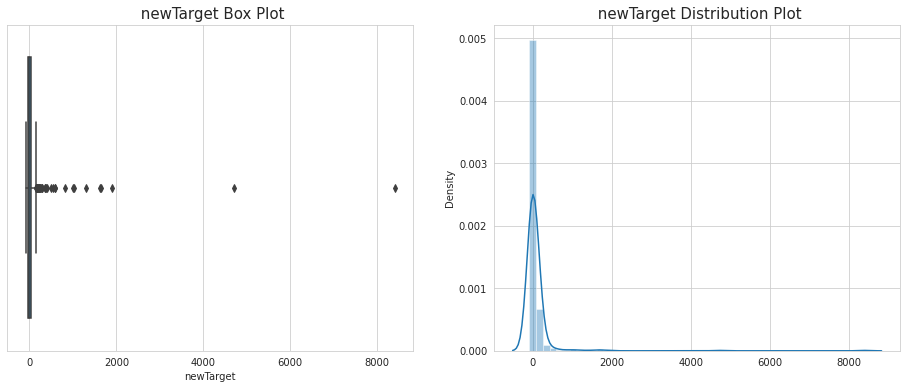

In [15]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="newTarget",data=df_B)
plt.title(' newTarget Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_B["newTarget"])
plt.title(' newTarget Distribution Plot', fontsize=15)

In [16]:
!pip install feature-engine
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

     |████████████████████████████████| 205 kB 13.3 MB/s 
     |████████████████████████████████| 9.8 MB 64.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [17]:
df_B.isna().sum()


playerId                      0
firstName                     0
lastName                      0
positionText                  0
teamName                      0
teamRank                      0
height                        0
weight                        0
age                           0
newToTeam                     0
newToLeague                   0
foreign                       0
apps                          0
firstStart                    0
subOn                         0
minsPlayed                    0
goal                          0
assistTotal                   0
yellowCard                    0
redCard                       0
totalShots                    0
shotsPerGame                  0
goalShotRatio                 0
keyPassPerGame_x              0
totalPassesPerGame            0
passSuccess                   0
dribbleWonPerGame             0
foulGivenPerGame              0
offsideGivenPerGame           0
dispossessedPerGame           0
turnoverPerGame               0
tacklePe

In [18]:
df_B.dropna(axis =0 , inplace = True)

In [19]:
discretizer = EqualFrequencyDiscretiser(q=2, variables = ['newTarget'])
discretizer.fit(df_B)

EqualFrequencyDiscretiser(q=2, variables=['newTarget'])

In [20]:
df_new_b = discretizer.transform(df_B)
df_new_b['newTarget'].describe()

count    459.000000
mean       0.459695
std        0.498917
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: newTarget, dtype: float64

Text(0.5, 1.0, ' newTarget Distribution Plot')

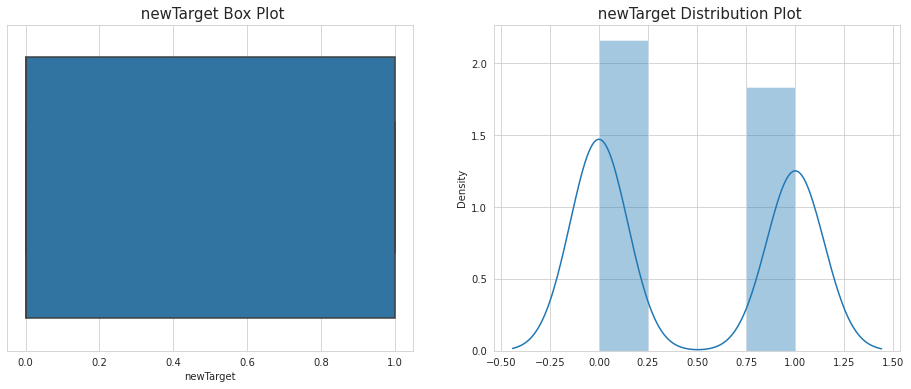

In [21]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="newTarget",data=df_new_b)
plt.title(' newTarget Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_new_b["newTarget"])
plt.title(' newTarget Distribution Plot', fontsize=15)

In [22]:
discretizer.binner_dict_

{'newTarget': [-inf, 0.0, inf]}

Text(0, 0.5, 'Number of Players')

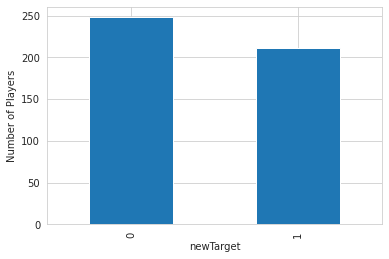

In [23]:
# with equal frequency discretisation, each bin contains approximately
# the same number of observations.
df_new_b.groupby('newTarget')['newTarget'].count().plot.bar()
plt.ylabel('Number of Players')

In [24]:
df_new_b['newTarget'].value_counts()

0    248
1    211
Name: newTarget, dtype: int64

In [25]:
df_new_b['ValuationRatio'] = df_new_b['newTarget']

In [26]:
df_new_b['ValuationRatio'].value_counts()

0    248
1    211
Name: ValuationRatio, dtype: int64

Text(0.5, 1.0, ' ValuationRatio Distribution Plot')

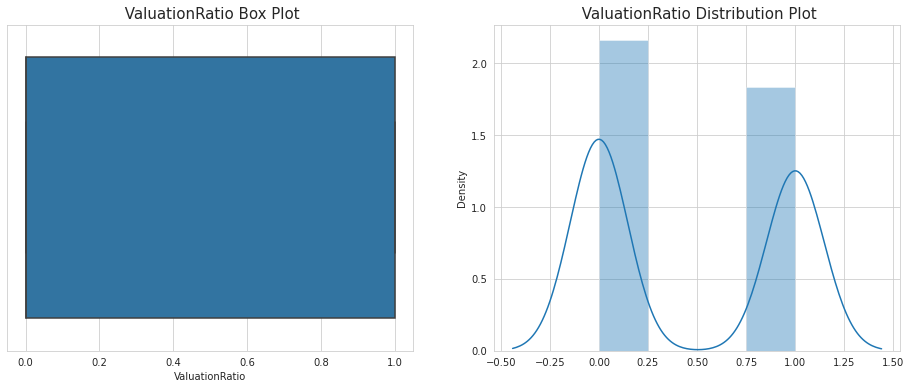

In [27]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="ValuationRatio",data=df_new_b)
plt.title(' ValuationRatio Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_new_b["ValuationRatio"])
plt.title(' ValuationRatio Distribution Plot', fontsize=15)

In [28]:
df_new_b.head(20)

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans,newTarget,ValuationRatio
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.000000,1.838710,1.967742,1.483871,0.580645,1.161290,0.000000,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000,2,2,1,1
6,86081,Anastasios,Bakasetas,Forward,Trabzonspor,4,181,75,28,1,0,1,19,18,1,1603,7,2,5,0,53.0,2.789474,0.132075,1.842105,44.421053,84.241706,1.631579,1.736842,0.000000,1.105263,1.263158,1.526316,0.315789,1.421053,0.052632,0.263158,0.578947,0.000000,1.684211,3.526316,0.105263,0.736842,5000000,7000000,3,0,1,1
8,124209,Caleb,Ekuban,Forward,Trabzonspor,4,188,80,27,0,0,1,32,32,0,2748,10,4,3,0,71.0,2.218750,0.140845,1.437500,32.343750,78.067633,2.406250,1.781250,0.093750,1.937500,3.156250,1.281250,0.687500,1.250000,0.031250,0.531250,0.625000,0.156250,0.156250,0.937500,0.000000,1.437500,5500000,7000000,3,2,1,1
9,327719,Anthony,Nwakaeme,Forward,Trabzonspor,4,185,80,32,0,0,1,34,34,0,2970,7,5,3,1,105.0,3.088235,0.066667,1.235294,41.294118,79.059829,2.852941,1.088235,0.411765,2.735294,2.352941,1.558824,0.764706,1.000000,0.088235,1.029412,0.970588,0.029412,0.470588,2.617647,0.029412,1.117647,5000000,5000000,3,2,0,0
10,77827,Adem,Büyük,Forward,Yeni Malatyaspor,15,177,70,33,0,1,0,34,34,0,2900,17,3,10,0,74.0,2.176471,0.229730,1.058824,24.147059,70.036541,1.558824,3.352941,0.235294,1.735294,2.176471,1.676471,0.735294,1.794118,0.029412,0.852941,0.764706,0.147059,0.264706,2.058824,0.088235,2.147059,800000,1300000,3,2,1,1
11,361726,Gedson,Carvalho Fernandes,Midfielder,Galatasaray,2,182,71,22,1,1,1,17,17,0,1399,0,3,2,0,17.0,1.000000,0.000000,1.294118,48.294118,88.428745,1.882353,2.000000,0.000000,1.235294,1.823529,3.058824,1.176471,1.294118,0.000000,0.941176,1.647059,0.176471,0.764706,1.647059,0.000000,0.352941,12500000,12500000,2,0,0,0
13,401246,Aaron-Salem,Boupendza,Forward,Hatayspor,6,180,80,25,1,1,1,36,25,11,2501,22,1,7,0,111.0,3.083333,0.198198,0.500000,16.527778,71.764706,2.583333,1.361111,0.638889,0.888889,3.361111,1.166667,0.472222,1.638889,0.000000,0.416667,1.166667,0.027778,0.194444,0.861111,0.027778,1.250000,100000,8500000,3,2,1,1
15,86743,Vincent,Aboubakar,Forward,Besiktas,1,182,82,29,1,1,1,26,25,1,2136,15,5,0,0,79.0,3.038462,0.189873,0.923077,24.653846,76.287051,1.346154,1.076923,0.730769,1.923077,3.076923,0.230769,0.115385,0.500000,0.000000,0.653846,0.192308,0.038462,0.115385,0.423077,0.000000,1.230769,5000000,10000000,3,0,1,1
16,273229,Cyle,Larin,Forward,Besiktas,1,188,90,26,0,0,1,38,33,5,2887,19,5,3,1,78.0,2.052632,0.243590,0.842105,24.973684,79.452055,1.210526,1.657895,0.421053,1.868421,3.052632,0.789474,0.552632,1.473684,0.000000,0.973684,0.526316,0.078947,0.026316,0.315789,0.000000,2.263158,4000000,11000000,3,2,1,1
17,80882,Fabio,Borini,Forward,Fatih Karagumruk,8,180,73,30,1,1,1,20,19,1,1685,9,1,3,0,44.0,2.200000,0.204545,0.650000,25.900000,71.814672,0.650000,2.750000,0.500000,1.250000,1.700000,1.000000,1.650000,1.600000,0.000000,0.950000,0.700000,0.100000,0.250000,1.050000,0.000000,0.700000,4000000,4000000,3,0,0,0


**Cluster B**

In [29]:

df_new = df_new_b.loc[df_new_b.kumeNoKmeans == 0]  

In [30]:
df_new.head()

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans,newTarget,ValuationRatio
6,86081,Anastasios,Bakasetas,Forward,Trabzonspor,4,181,75,28,1,0,1,19,18,1,1603,7,2,5,0,53.0,2.789474,0.132075,1.842105,44.421053,84.241706,1.631579,1.736842,0.000000,1.105263,1.263158,1.526316,0.315789,1.421053,0.052632,0.263158,0.578947,0.000000,1.684211,3.526316,0.105263,0.736842,5000000,7000000,3,0,1,1
11,361726,Gedson,Carvalho Fernandes,Midfielder,Galatasaray,2,182,71,22,1,1,1,17,17,0,1399,0,3,2,0,17.0,1.000000,0.000000,1.294118,48.294118,88.428745,1.882353,2.000000,0.000000,1.235294,1.823529,3.058824,1.176471,1.294118,0.000000,0.941176,1.647059,0.176471,0.764706,1.647059,0.000000,0.352941,12500000,12500000,2,0,0,0
15,86743,Vincent,Aboubakar,Forward,Besiktas,1,182,82,29,1,1,1,26,25,1,2136,15,5,0,0,79.0,3.038462,0.189873,0.923077,24.653846,76.287051,1.346154,1.076923,0.730769,1.923077,3.076923,0.230769,0.115385,0.500000,0.000000,0.653846,0.192308,0.038462,0.115385,0.423077,0.000000,1.230769,5000000,10000000,3,0,1,1
17,80882,Fabio,Borini,Forward,Fatih Karagumruk,8,180,73,30,1,1,1,20,19,1,1685,9,1,3,0,44.0,2.200000,0.204545,0.650000,25.900000,71.814672,0.650000,2.750000,0.500000,1.250000,1.700000,1.000000,1.650000,1.600000,0.000000,0.950000,0.700000,0.100000,0.250000,1.050000,0.000000,0.700000,4000000,4000000,3,0,0,0
28,345370,Nazim,Sangaré,Defender,Fenerbahce,3,182,72,27,1,0,0,19,18,1,1589,1,1,2,0,7.0,0.368421,0.142857,0.894737,38.684211,80.680272,0.789474,1.789474,0.000000,0.526316,1.052632,2.736842,2.421053,0.947368,0.157895,1.736842,0.736842,0.210526,0.315789,1.157895,0.000000,1.263158,1800000,2500000,1,0,1,1


**Feature Scaling**

In [31]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["apps"]]
df_new["apps"] = scaler.fit_transform(dataset_numerical)

In [32]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["firstStart"]]
df_new["firstStart"] = scaler.fit_transform(dataset_numerical)

In [33]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["minsPlayed"]]
df_new["minsPlayed"] = scaler.fit_transform(dataset_numerical)

In [34]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["goal"]]
df_new["goal"] = scaler.fit_transform(dataset_numerical)

In [35]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["foulGivenPerGame"]]
df_new["foulGivenPerGame"] = scaler.fit_transform(dataset_numerical)

In [36]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["tacklePerGame"]]
df_new["tacklePerGame"] = scaler.fit_transform(dataset_numerical)

In [37]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["interceptionPerGame"]]
df_new["interceptionPerGame"] = scaler.fit_transform(dataset_numerical)

In [38]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["foulsPerGame"]]
df_new["foulsPerGame"] = scaler.fit_transform(dataset_numerical)

In [39]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["offsideWonPerGame"]]
df_new["offsideWonPerGame"] = scaler.fit_transform(dataset_numerical)

In [40]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["wasDribbledPerGame"]]
df_new["wasDribbledPerGame"] = scaler.fit_transform(dataset_numerical)

In [41]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["outfielderBlockPerGame"]]
df_new["outfielderBlockPerGame"] = scaler.fit_transform(dataset_numerical)

In [42]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["aerialWonPerGame"]]
df_new["aerialWonPerGame"] = scaler.fit_transform(dataset_numerical)

In [43]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["keyPassPerGame_x"]]
df_new["keyPassPerGame_x"] = scaler.fit_transform(dataset_numerical)

In [44]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["dribbleWonPerGame"]]
df_new["dribbleWonPerGame"] = scaler.fit_transform(dataset_numerical)

In [45]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["assistTotal"]]
df_new["assistTotal"] = scaler.fit_transform(dataset_numerical)

In [46]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["totalPassesPerGame"]]
df_new["totalPassesPerGame"] = scaler.fit_transform(dataset_numerical)

In [47]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["accurateCrossesPerGame"]]
df_new["accurateCrossesPerGame"] = scaler.fit_transform(dataset_numerical)

In [48]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["accurateLongPassPerGame"]]
df_new["accurateLongPassPerGame"] = scaler.fit_transform(dataset_numerical)

In [49]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["accurateThroughBallPerGame"]]
df_new["accurateThroughBallPerGame"] = scaler.fit_transform(dataset_numerical)

In [50]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["clearancePerGame"]]
df_new["clearancePerGame"] = scaler.fit_transform(dataset_numerical)

In [51]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["offsideGivenPerGame"]]
df_new["offsideGivenPerGame"] = scaler.fit_transform(dataset_numerical)

In [52]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["passSuccess"]]
df_new["passSuccess"] = scaler.fit_transform(dataset_numerical)

## **Sınıflandırma modellerinde kullanılacak featureların seçimi**

In [53]:
df_new.columns

Index(['playerId', 'firstName', 'lastName', 'positionText', 'teamName',
       'teamRank', 'height', 'weight', 'age', 'newToTeam', 'newToLeague',
       'foreign', 'apps', 'firstStart', 'subOn', 'minsPlayed', 'goal',
       'assistTotal', 'yellowCard', 'redCard', 'totalShots', 'shotsPerGame',
       'goalShotRatio', 'keyPassPerGame_x', 'totalPassesPerGame',
       'passSuccess', 'dribbleWonPerGame', 'foulGivenPerGame',
       'offsideGivenPerGame', 'dispossessedPerGame', 'turnoverPerGame',
       'tacklePerGame', 'interceptionPerGame', 'foulsPerGame',
       'offsideWonPerGame', 'clearancePerGame', 'wasDribbledPerGame',
       'outfielderBlockPerGame', 'accurateCrossesPerGame',
       'accurateLongPassPerGame', 'accurateThroughBallPerGame',
       'aerialWonPerGame', 'preValue', 'currentValue', 'position',
       'kumeNoKmeans', 'newTarget', 'ValuationRatio'],
      dtype='object')

In [54]:
X = df_new [['newToTeam','newToLeague',
'foreign', 'apps', 'firstStart', 'minsPlayed', 'goal',
       "foulGivenPerGame","tacklePerGame","interceptionPerGame","foulsPerGame",
        "offsideWonPerGame","wasDribbledPerGame","outfielderBlockPerGame",
        "aerialWonPerGame","keyPassPerGame_x","dribbleWonPerGame","assistTotal","totalPassesPerGame","accurateCrossesPerGame","accurateLongPassPerGame",
        "accurateThroughBallPerGame","clearancePerGame" ,"offsideGivenPerGame",
       "passSuccess"
       ]]
y = df_new["ValuationRatio"]

In [55]:
X.head() # Modele dahil edeceğimiz Kategorik değişkenlerimiz binary olduğu için bir encode işlemine gerek yok.

,newToTeam,newToLeague,foreign,apps,firstStart,minsPlayed,goal,foulGivenPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,wasDribbledPerGame,outfielderBlockPerGame,aerialWonPerGame,keyPassPerGame_x,dribbleWonPerGame,assistTotal,totalPassesPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,clearancePerGame,offsideGivenPerGame,passSuccess
6,1,0,1,-1.465688,-0.275617,-0.274385,1.516841,1.901414,0.881962,-0.800664,1.117181,-0.310115,-0.010370,-0.827330,-0.372512,3.100128,2.210918,0.379521,1.384636,4.375673,1.148417,2.525665,-0.739885,-0.792889,0.682618
11,1,1,1,-1.876675,-0.543175,-0.979429,-0.855392,2.449403,3.360547,0.642887,0.843793,-0.607252,2.815174,0.013860,-0.884021,1.784796,2.742215,1.087393,1.711262,1.548004,-0.070391,-0.503653,-0.151953,-0.792889,1.257263
15,1,1,1,-0.027234,1.597288,1.567716,4.227966,0.527225,-1.213376,-1.136787,-0.866550,-0.607252,-1.033173,-0.643993,0.285596,0.894189,1.606208,2.503136,-0.282384,-0.448795,-0.864215,-0.503653,-0.401107,4.581090,-0.409108
17,1,1,1,-1.260194,-0.008059,0.009015,2.194623,4.011172,0.030731,1.437100,1.502592,-0.607252,0.309858,-0.350655,-0.421600,0.238724,0.131317,-0.328350,-0.177293,-0.034825,-0.457619,-0.503653,-0.144302,2.884044,-1.022914
28,1,0,0,-1.465688,-0.275617,-0.322771,-0.516502,2.011012,2.839794,2.730325,0.096977,0.284161,0.407319,0.176195,0.328751,0.826164,0.426810,-0.328350,0.900833,0.167492,-0.387643,-0.503653,0.537994,-0.792889,0.193834


In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [57]:
df_new.ValuationRatio.value_counts()

0    94
1    72
Name: ValuationRatio, dtype: int64

In [58]:
print(f"Train set       --> feature size: {len(X_train)}, target size: {len(y_train)}")
print(f"Test set        --> feature size: {len(X_test)}, target size: {len(y_test)}")

Train set       --> feature size: 116, target size: 116
Test set        --> feature size: 50, target size: 50


# **Modelleme**

**Default Classifier**

In [59]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)

dummy_pred = clf.predict(X_test)
clf.score(X_test, y_test)


0.56

In [60]:
print(classification_report(dummy_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        50
           1       0.00      0.00      0.00         0

    accuracy                           0.56        50
   macro avg       0.50      0.28      0.36        50
weighted avg       1.00      0.56      0.72        50



**XGBoost**

In [61]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)

In [62]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [63]:
y_predXGB = xgb_model.predict(X_test)
accuracy_score(y_test, y_predXGB)

0.6

Text(33.0, 0.5, 'TRUE')

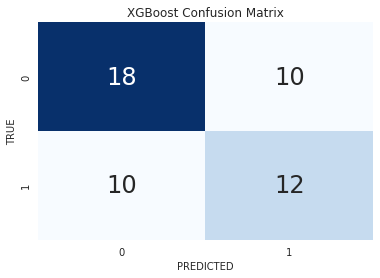

In [64]:
mtks = confusion_matrix(y_test, y_predXGB)
plt.title("XGBoost Confusion Matrix")
sns.heatmap(mtks,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [65]:
print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        28
           1       0.55      0.55      0.55        22

    accuracy                           0.60        50
   macro avg       0.59      0.59      0.59        50
weighted avg       0.60      0.60      0.60        50



**XGBoost modeline göre sınıflandırmada featureların etkilerini gösteren plot**

Text(0.5, 0, 'XGBoost Model Değişken Önem Düzeyleri')

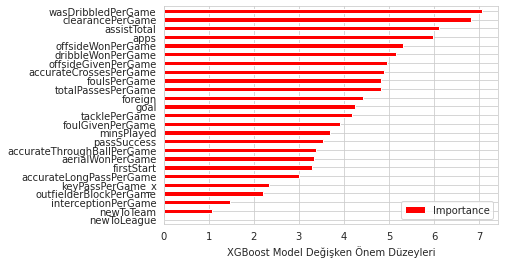

In [66]:
ImportanceXGB = pd.DataFrame({"Importance": xgb_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceXGB.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "red")

plt.xlabel("XGBoost Model Değişken Önem Düzeyleri")

**RandomForrest**

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_predRF = rf_model.predict(X_test)
accuracy_score(y_test, y_predRF)

0.48

In [68]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

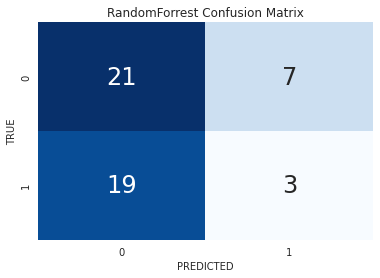

In [69]:
mtks2 = confusion_matrix(y_test, y_predRF)
plt.title("RandomForrest Confusion Matrix")
sns.heatmap(mtks2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

Text(0.5, 0, 'Random Forrest Model Değişken Önem Düzeyleri')

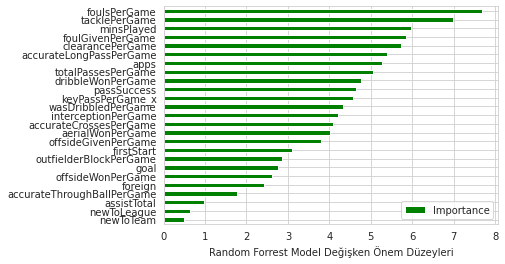

In [70]:
ImportanceRF = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceRF.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Random Forrest Model Değişken Önem Düzeyleri")

In [71]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.53      0.75      0.62        28
           1       0.30      0.14      0.19        22

    accuracy                           0.48        50
   macro avg       0.41      0.44      0.40        50
weighted avg       0.43      0.48      0.43        50



**KNN**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_predKNN = knn_model.predict(X_test)
accuracy_score(y_test, y_predKNN)

0.48

In [73]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Text(33.0, 0.5, 'TRUE')

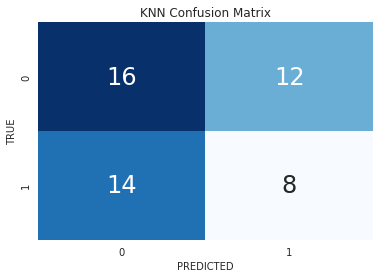

In [74]:
mtks3 = confusion_matrix(y_test, y_predKNN)
plt.title("KNN Confusion Matrix")
sns.heatmap(mtks3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [75]:
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        28
           1       0.40      0.36      0.38        22

    accuracy                           0.48        50
   macro avg       0.47      0.47      0.47        50
weighted avg       0.47      0.48      0.48        50



**Decision Tree -- CART**

In [76]:
from sklearn.tree import DecisionTreeClassifier #CART
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train, y_train)
y_predDT = DT_model.predict(X_test)
accuracy_score(y_test, y_predDT)

0.5

In [77]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Text(33.0, 0.5, 'TRUE')

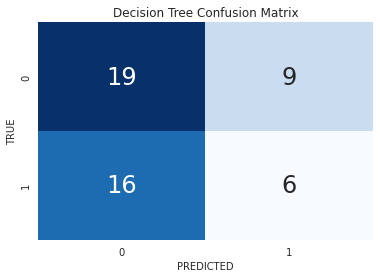

In [78]:
mtks4 = confusion_matrix(y_test, y_predDT)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(mtks4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [79]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.54      0.68      0.60        28
           1       0.40      0.27      0.32        22

    accuracy                           0.50        50
   macro avg       0.47      0.48      0.46        50
weighted avg       0.48      0.50      0.48        50



Text(0.5, 0, 'Decision Tree Model Değişken Önem Düzeyleri')

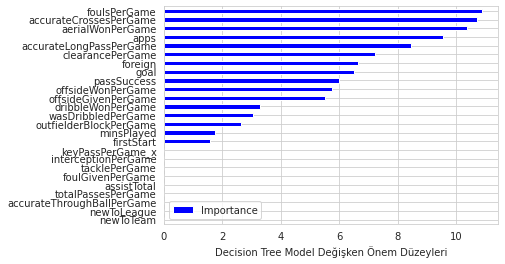

In [80]:
ImportanceDT = pd.DataFrame({"Importance": DT_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceDT.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Decision Tree Model Değişken Önem Düzeyleri")

**Gradient Boosting Machines**

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_predGBM = gbm_model.predict(X_test)
accuracy_score(y_test, y_predGBM)

0.52

In [82]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

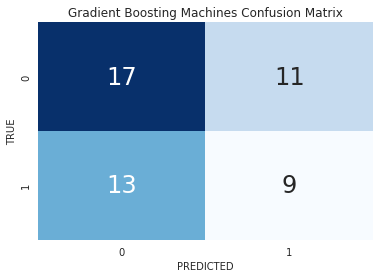

In [83]:
mtks5 = confusion_matrix(y_test, y_predGBM)
plt.title("Gradient Boosting Machines Confusion Matrix")
sns.heatmap(mtks5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [84]:
print(classification_report(y_test, y_predGBM))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        28
           1       0.45      0.41      0.43        22

    accuracy                           0.52        50
   macro avg       0.51      0.51      0.51        50
weighted avg       0.52      0.52      0.52        50



Text(0.5, 0, 'GBM Model Değişken Önem Düzeyleri')

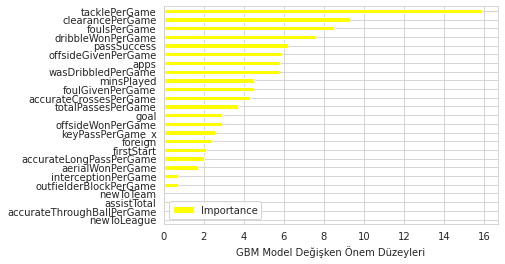

In [85]:
ImportanceGBM = pd.DataFrame({"Importance": gbm_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceGBM.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "yellow")

plt.xlabel("GBM Model Değişken Önem Düzeyleri")

**Logistic Regression**

In [86]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression()
loj_model = loj.fit(X_train, y_train)
y_predLOJ = loj_model.predict(X_test)
accuracy_score(y_test, y_predLOJ)

0.5

In [87]:
loj_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

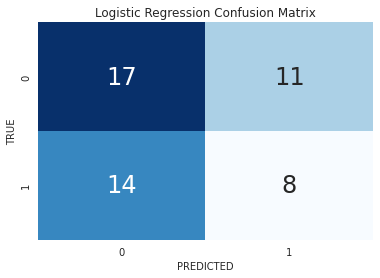

In [88]:
mtks6 = confusion_matrix(y_test, y_predLOJ)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(mtks6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [89]:
print(classification_report(y_test, y_predLOJ))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58        28
           1       0.42      0.36      0.39        22

    accuracy                           0.50        50
   macro avg       0.48      0.49      0.48        50
weighted avg       0.49      0.50      0.49        50



**SVM**

In [90]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_predSVM = svm_model.predict(X_test)
accuracy_score(y_test, y_predSVM)

0.54

In [91]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Text(33.0, 0.5, 'TRUE')

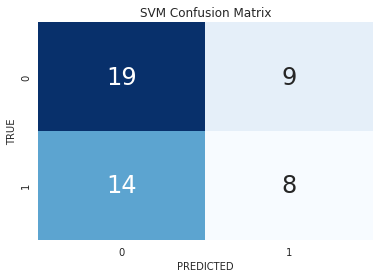

In [92]:
mtks7 = confusion_matrix(y_test, y_predSVM)
plt.title("SVM Confusion Matrix")
sns.heatmap(mtks7,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [93]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62        28
           1       0.47      0.36      0.41        22

    accuracy                           0.54        50
   macro avg       0.52      0.52      0.52        50
weighted avg       0.53      0.54      0.53        50



# **Modellerin Kıyaslanması**

In [94]:
accuracies = {}
accuracies['LogisticReg.'] = round(accuracy_score(y_test, y_predLOJ),2)
accuracies['GradientBoostingMachine'] = round(accuracy_score(y_test, y_predGBM),2)
accuracies['DecisionTree'] = round(accuracy_score(y_test, y_predDT),2)
accuracies['RandomForrest'] = round(accuracy_score(y_test, y_predRF),2)
accuracies['KNN'] = round(accuracy_score(y_test, y_predKNN),2)
accuracies['XGBoost'] = round(accuracy_score(y_test, y_predXGB),2)
accuracies['SVM'] = round(accuracy_score(y_test, y_predSVM),2)

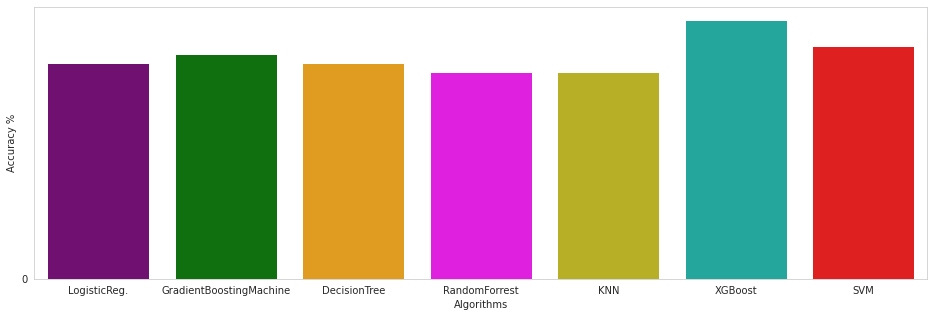

In [95]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'red']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [96]:
indexr=['Accuracy']
df_acc = pd.DataFrame(accuracies,index=indexr)
df_acc


,LogisticReg.,GradientBoostingMachine,DecisionTree,RandomForrest,KNN,XGBoost,SVM
Accuracy,0.5,0.52,0.5,0.48,0.48,0.6,0.54
